In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/AAPL.csv", parse_dates=["Date"])
df.dropna(inplace=True)
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,Close,High,Low,Open,Volume
0,2015-01-02,18.20199966430664,18.95101593974178,18.0124886098606,18.95101593974178,5600
1,2015-01-05,17.763416290283203,18.38248346170629,17.73544086130505,18.38248346170629,3200
2,2015-01-06,17.696640014648438,17.859077572225114,17.47103267829136,17.859077572225114,3300
3,2015-01-07,17.77785873413086,17.895173791296337,17.73273623426154,17.895173791296337,3900
4,2015-01-08,18.1749267578125,18.1749267578125,17.994441918578705,17.994441918578705,700
...,...,...,...,...,...,...
2510,2024-12-23,59.2400016784668,59.68000030517578,58.165000915527344,59.52000045776367,7760600
2511,2024-12-24,60.959999084472656,60.9900016784668,59.439998626708984,59.630001068115234,4801700
2512,2024-12-26,60.959999084472656,61.1349983215332,60.040000915527344,60.720001220703125,6885500
2513,2024-12-27,59.27000045776367,60.599998474121094,58.439998626708984,60.540000915527344,9592600


Preprocessing the data

In [58]:
# 1. Strip whitespace from column names
df.columns = df.columns.str.strip()

# 2. Convert Date column to datetime
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 3. Convert all other columns to numeric (safely)
for col in df.columns:
    if col != "Date":
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. Drop rows where Date or Close is missing
df.dropna(subset=["Date", "Close"], inplace=True)

# 5. Sort and reset index
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(inplace=True)
df

,Date,Close,High,Low,Open,Volume
0,2015-01-02,18.202000,18.951016,18.012489,18.951016,5600
1,2015-01-05,17.763416,18.382483,17.735441,18.382483,3200
2,2015-01-06,17.696640,17.859078,17.471033,17.859078,3300
3,2015-01-07,17.777859,17.895174,17.732736,17.895174,3900
4,2015-01-08,18.174927,18.174927,17.994442,17.994442,700
...,...,...,...,...,...,...
2510,2024-12-23,59.240002,59.680000,58.165001,59.520000,7760600
2511,2024-12-24,60.959999,60.990002,59.439999,59.630001,4801700
2512,2024-12-26,60.959999,61.134998,60.040001,60.720001,6885500
2513,2024-12-27,59.270000,60.599998,58.439999,60.540001,9592600


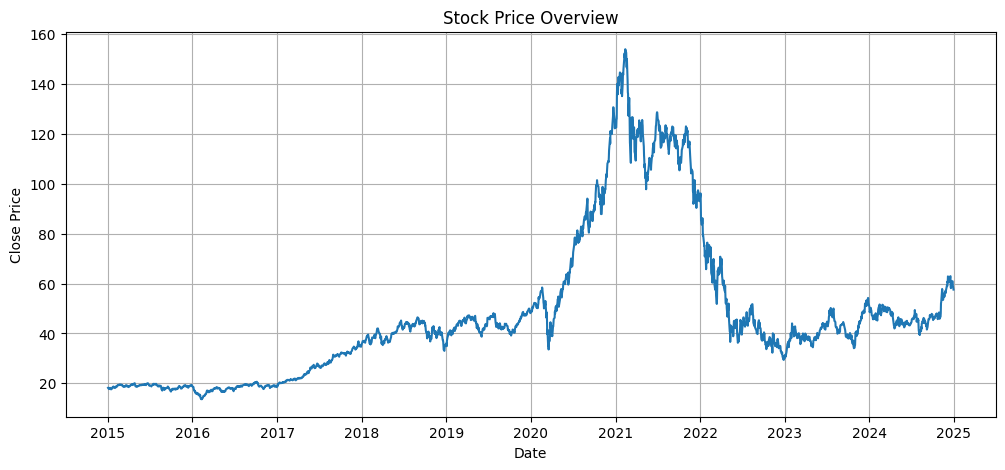

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"])
plt.title("Stock Price Overview")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

In [60]:
import pandas_ta as ta

# 14 period RSI
df["RSI"] = ta.rsi(df["Close"], length=14)

short_window = 20
long_window = 50

# Calculate Moving Averages
df["SMA_Short"] = df["Close"].rolling(window=short_window).mean()
df["SMA_Long"] = df["Close"].rolling(window=long_window).mean()

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
# df = df[["Date", "Close", "SMA_10", "SMA_50", "RSI"]]
df

,Date,Close,High,Low,Open,Volume,RSI,SMA_Short,SMA_Long
0,2015-03-16,18.770531,18.797604,18.770531,18.797604,300,46.101223,19.128388,18.657004
1,2015-03-17,18.833702,18.833702,18.833702,18.833702,200,48.084303,19.107181,18.669638
2,2015-03-18,18.770531,18.770531,18.770531,18.770531,1400,46.251679,19.081462,18.689780
3,2015-03-19,19.041258,19.077354,19.041258,19.077354,600,54.291763,19.061609,18.716673
4,2015-03-20,19.248817,19.248817,19.248817,19.248817,200,59.316463,19.045636,18.746092
...,...,...,...,...,...,...,...,...,...
2461,2024-12-23,59.240002,59.680000,58.165001,59.520000,7760600,53.186687,59.909001,54.347600
2462,2024-12-24,60.959999,60.990002,59.439999,59.630001,4801700,58.035749,60.105501,54.619400
2463,2024-12-26,60.959999,61.134998,60.040001,60.720001,6885500,58.035749,60.343501,54.892800
2464,2024-12-27,59.270000,60.599998,58.439999,60.540001,9592600,51.908636,60.449500,55.124400


In [65]:
df["signal"] = 0

# Generate Signals
df["signal"] = 0  # Default to Hold
df["signal"] = np.where(df["SMA_Short"] > df["SMA_Long"], 1, 0)   # Buy Signal
df["signal"] = np.where(df["SMA_Short"] < df["SMA_Long"], -1, df["signal"])  # Sell Signal
df[df["signal"] == 1]


,Date,Close,High,Low,Open,Volume,RSI,SMA_Short,SMA_Long,signal
0,2015-03-16,18.770531,18.797604,18.770531,18.797604,300,46.101223,19.128388,18.657004,1
1,2015-03-17,18.833702,18.833702,18.833702,18.833702,200,48.084303,19.107181,18.669638,1
2,2015-03-18,18.770531,18.770531,18.770531,18.770531,1400,46.251679,19.081462,18.689780,1
3,2015-03-19,19.041258,19.077354,19.041258,19.077354,600,54.291763,19.061609,18.716673,1
4,2015-03-20,19.248817,19.248817,19.248817,19.248817,200,59.316463,19.045636,18.746092,1
...,...,...,...,...,...,...,...,...,...,...
2461,2024-12-23,59.240002,59.680000,58.165001,59.520000,7760600,53.186687,59.909001,54.347600,1
2462,2024-12-24,60.959999,60.990002,59.439999,59.630001,4801700,58.035749,60.105501,54.619400,1
2463,2024-12-26,60.959999,61.134998,60.040001,60.720001,6885500,58.035749,60.343501,54.892800,1
2464,2024-12-27,59.270000,60.599998,58.439999,60.540001,9592600,51.908636,60.449500,55.124400,1


In [67]:
# Optional: Filter for rows where signal changes (actual trade signals)
df["signal_shifted"] = df["signal"].shift(1)
df["trade_signal"] = np.where(df["signal"] != df["signal_shifted"], df["signal"], 0)
df

,Date,Close,High,Low,Open,Volume,RSI,SMA_Short,SMA_Long,signal,signal_shifted,trade_signal
0,2015-03-16,18.770531,18.797604,18.770531,18.797604,300,46.101223,19.128388,18.657004,1,NaN,1
1,2015-03-17,18.833702,18.833702,18.833702,18.833702,200,48.084303,19.107181,18.669638,1,1.0,0
2,2015-03-18,18.770531,18.770531,18.770531,18.770531,1400,46.251679,19.081462,18.689780,1,1.0,0
3,2015-03-19,19.041258,19.077354,19.041258,19.077354,600,54.291763,19.061609,18.716673,1,1.0,0
4,2015-03-20,19.248817,19.248817,19.248817,19.248817,200,59.316463,19.045636,18.746092,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2024-12-23,59.240002,59.680000,58.165001,59.520000,7760600,53.186687,59.909001,54.347600,1,1.0,0
2462,2024-12-24,60.959999,60.990002,59.439999,59.630001,4801700,58.035749,60.105501,54.619400,1,1.0,0
2463,2024-12-26,60.959999,61.134998,60.040001,60.720001,6885500,58.035749,60.343501,54.892800,1,1.0,0
2464,2024-12-27,59.270000,60.599998,58.439999,60.540001,9592600,51.908636,60.449500,55.124400,1,1.0,0


In [71]:
buy_signals = df[df["trade_signal"] == 1]
sell_signals = df[df["trade_signal"] == -1]
sell_signals

,Date,Close,High,Low,Open,Volume,RSI,SMA_Short,SMA_Long,signal,signal_shifted,trade_signal
12,2015-04-01,18.499800,18.499800,18.499800,18.499800,1000,39.761243,18.853192,18.892556,-1,1.0,-1
48,2015-05-22,19.363428,19.420281,19.363428,19.420281,300,56.595869,19.095179,19.116774,-1,1.0,-1
88,2015-07-21,19.736128,19.799298,19.736128,19.799298,800,57.871048,19.396094,19.397375,-1,1.0,-1
209,2016-01-12,17.008163,17.224975,16.874388,16.911291,1700,30.025058,18.511276,18.585339,-1,1.0,-1
295,2016-05-16,16.865164,16.865164,16.865164,16.865164,100,42.562038,17.390169,17.396969,-1,1.0,-1
409,2016-10-26,18.756498,18.756498,18.756498,18.756498,100,37.471793,19.515382,19.537221,-1,1.0,-1
772,2018-04-09,36.147293,36.984624,36.147293,36.362233,187300,39.885527,38.366784,38.379530,-1,1.0,-1
860,2018-08-13,43.558052,44.015032,43.399182,43.959897,212100,53.437427,43.193588,43.240874,-1,1.0,-1
900,2018-10-09,40.520855,40.950734,40.221808,40.277877,640800,28.373687,43.756637,43.926814,-1,1.0,-1
947,2018-12-17,37.306099,38.920953,37.081816,38.735919,503400,37.395224,39.939584,39.963433,-1,1.0,-1
